In [10]:
######################
#import useful modules
######################

import sys
sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *

########
%matplotlib inline


## Load simulation

In [25]:
########################################

folder = './Figures/'

########################################
# Load simul
########################################

simulname = 'plain_master';
time = 234; 

################
# Coordinates for horizontal domain

ix0 = 450; iy0 = 430
dx  = 400; dy  = 400

simul = load(simul = simulname + ' [' + format(iy0-dy) + ',' + format(iy0+dy) +  ','\
                                      + format(ix0-dx) + ',' + format(ix0+dx) + ',[1,300,1]] '\
                                      + format(time), output = False);

########################################
# coordinates for vertical sections

ix = ix0 - simul.coord[2]
iy = iy0 - simul.coord[0]
ix1,ix2 = ix-dx,ix+dx


## Compute vorticity

In [26]:

mydepth = -2000

vrt = (var('vrt',simul, depths=[mydepth], method = 'old').data.T\
                  / tools.rho2psi(simul.f).T ).T


## Plot Horizontal section

Text(0.5, 1.0, '$\\zeta$/f')

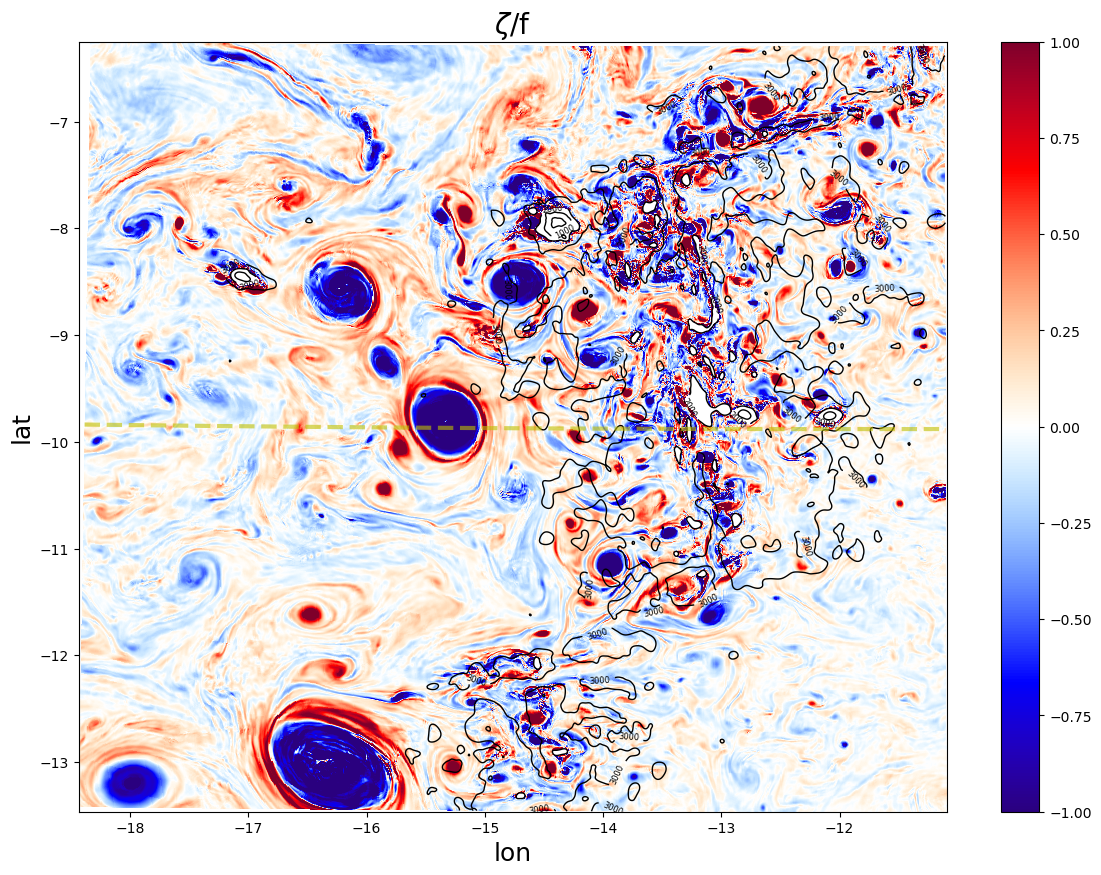

In [27]:

fig = plt.figure(figsize=(14.0,10.0))

###################

ax1 = plt.subplot(1,1,1);

plt.pcolormesh(simul.x, simul.y, ma.masked_invalid(vrt[:,:]),
                cmap = plot.ncview_colormap('blu_red'),
                vmin=-1., vmax=1.);plt.colorbar()



CS1 = plt.contour(simul.x,simul.y,simul.topo,[100,1000,2000,3000],\
                  colors = ('k',), linewidths = (1.,));
plt.clabel(CS1, fmt = '%2.0f', colors = 'k', fontsize=6)  ;

plt.plot(simul.x[ix1:ix2,iy],simul.y[ix1:ix2,iy],'y--',linewidth=3,alpha=0.6)

plt.xlabel(r'lon',fontsize=18); plt.ylabel(r'lat',fontsize=18)
plt.title(r'$\zeta$/f', fontsize=20)

#plt.savefig(simul.simul + '_map_vrt_withlines_' + format(-mydepth) + '_' +\
#             '{0:04}'.format(time)+ '.png', bbox_inches='tight', transparent='true', dpi=200); plt.clf()



## Load a zoom of simul for vertical section

In [28]:

dy_vert = 3

simul_vert = load(simul = simulname + ' [' + format(iy0-dy_vert) +','\
                                           + format(iy0+dy_vert) +','\
                                           + format(ix0-dx) +','\
                                           + format(ix0+dx) +',[1,300,1]] ' + format(time), output = False);


## Get vertical sections of variables

In [29]:
#################################################

[z_r,z_w] = tools.get_depths(simul)

# define lon in 3d
lon3d = np.tile(simul.x[:,dy_vert], (z_r.shape[-1],1)).T
lon3d_w = np.tile(simul.x[:,dy_vert], (z_w.shape[-1],1)).T

lon3d_psi = np.tile(tools.rho2psi(simul.x)[:,dy_vert], (z_r.shape[-1],1)).T

#################################################

vrt = (var('vrt',simul).data.T / tools.rho2psi(simul.f).T ).T

buoy = var('buoy',simul).data

AKv = var('AKv',simul).data


## Plot vertical section

/tmp/ipykernel_934496/2516706068.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lon3d_psi, tools.rho2psi(z_r)[:,dy_vert,:],


Text(0.5, 1.0, '$\\zeta/f$')

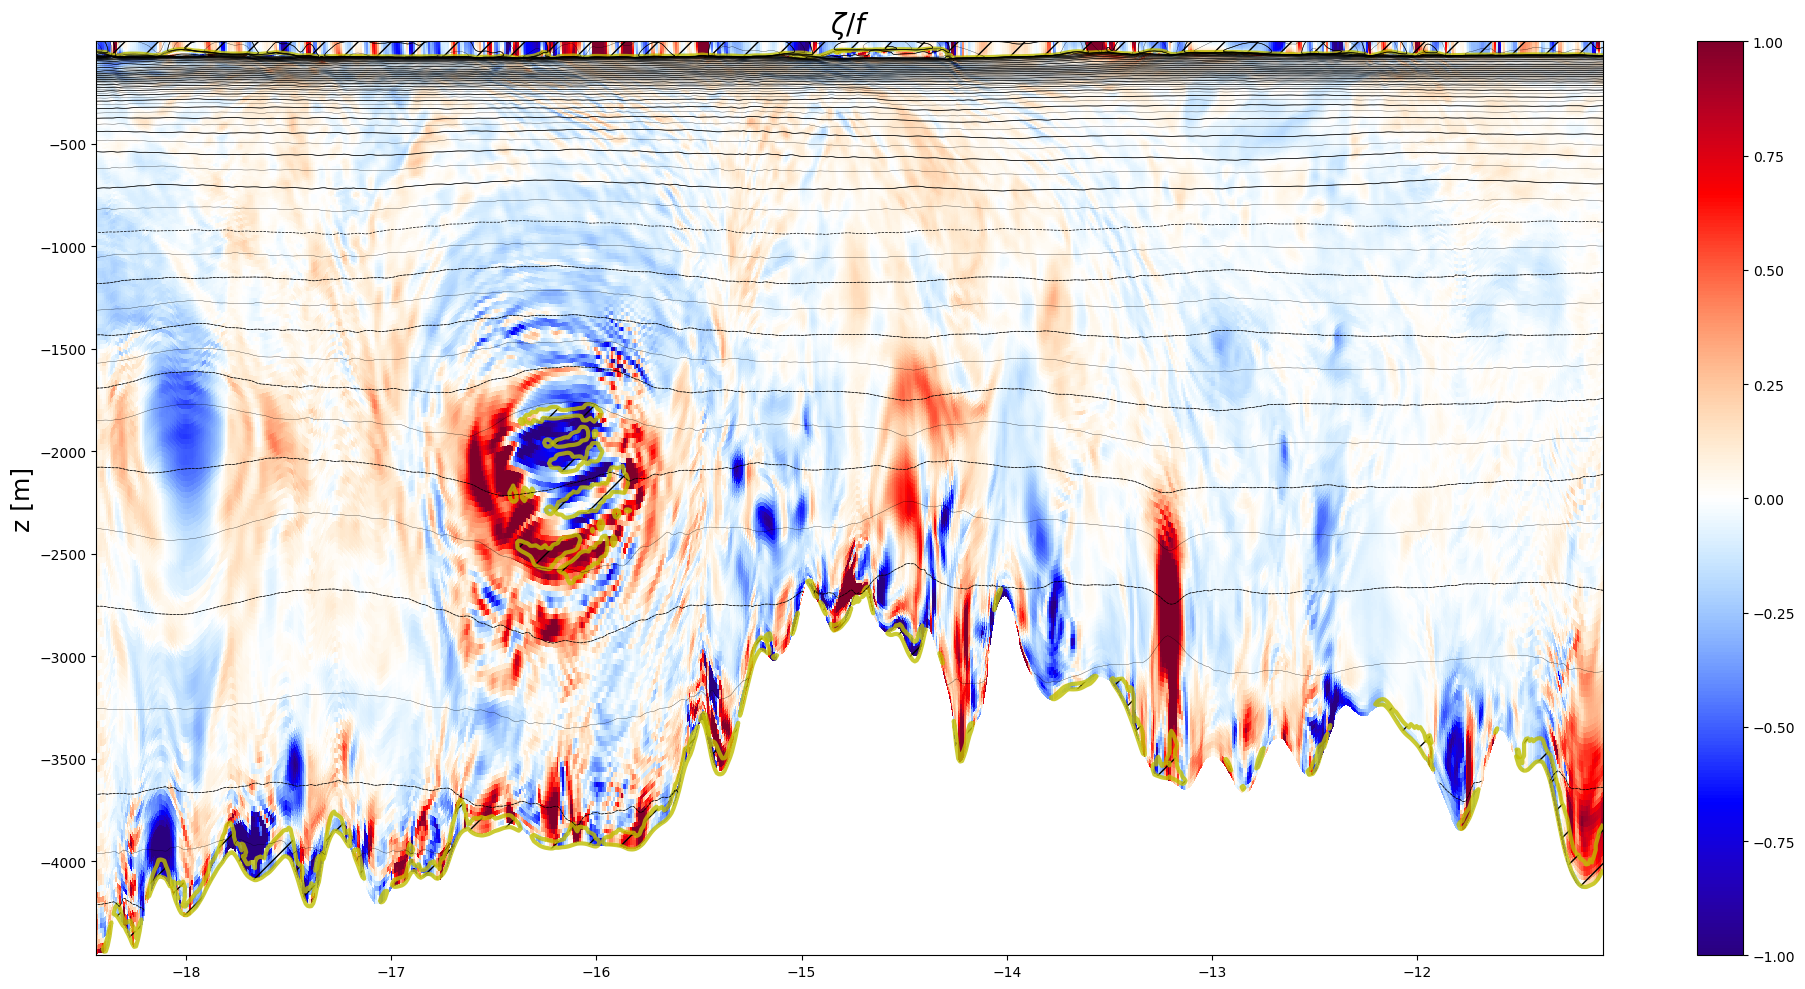

In [30]:
#################################################
# Plot  data
#################################################

levels = np.arange(-1.,1.01,0.01)*1.
my_cmap=plot.ncview_colormap('blu_red')

#################################################

fig = plt.figure(figsize=(20.0,10.0))
fig.set_tight_layout(1.)

###################

ax1 = plt.subplot(1,1,1);
plt.pcolormesh(lon3d_psi, tools.rho2psi(z_r)[:,dy_vert,:],
                vrt[:,dy_vert,:], vmin=levels.min(), vmax=levels.max() ,cmap = my_cmap); plt.colorbar()

CS1 = plt.contour(lon3d_w,z_w[:,dy_vert,:],AKv[:,dy_vert,:],[5e-4],colors = ('y',), linewidths = (3.,),alpha = 0.8);
plt.contourf(lon3d_w,z_w[:,dy_vert,:],AKv[:,dy_vert,:],[5e-4,1.], colors='none',hatches=['/'],extend='lower')

plt.contour(lon3d,z_r[:,dy_vert,:],np.abs(buoy[:,dy_vert,:]),np.arange(-3,3,0.0005),colors = ('k',), linewidths = (0.2,));
CS2 = plt.contour(lon3d,z_r[:,dy_vert,:],buoy[:,dy_vert,:],np.arange(-3,1,0.001),colors = ('k',), linewidths = (0.5,));

plt.ylabel(r'z [m]',fontsize=18)
plt.title(r'$\zeta/f$', fontsize=20)

###################

#plt.savefig(simul.simul + '_vrtx_AKv' + '{0:04}'.format(time) +  '.png', size=None, figure=None,bbox_inches='tight', magnification='auto',transparent='true', dpi=150)
#plt.clf()